<h2>Data Analysis using Classification methods</h2>

In [1]:
import scipy, pandas as pd, numpy as np, matplotlib.pyplot as plt, re, seaborn as sb

In [2]:
job_change_test = pd.read_csv("C:/Users/X/Downloads/ML2023/ML2023/job_change/job_change_test.csv")
job_change_train = pd.read_csv("C:/Users/X/Downloads/ML2023/ML2023/job_change/job_change_train.csv")

In [3]:
job_change_test.dtypes

id                          int64
gender                     object
age                         int64
education                  object
field_of_studies           object
is_studying                object
county                     object
relative_wage             float64
years_since_job_change     object
years_of_experience        object
hours_of_training           int64
is_certified                int64
size_of_company            object
type_of_company            object
dtype: object

In [4]:
job_change_train.dtypes

id                          int64
gender                     object
age                         int64
education                  object
field_of_studies           object
is_studying                object
county                     object
relative_wage             float64
years_since_job_change     object
years_of_experience        object
hours_of_training           int64
is_certified                int64
size_of_company            object
type_of_company            object
willing_to_change_job      object
dtype: object

In [5]:
print(f'Job change train dataset length is: {len(job_change_train.dtypes)} while Job change test dataset length is: {len(job_change_test.dtypes)})')

Job change train dataset length is: 15 while Job change test dataset length is: 14)


In [6]:
missing_count = job_change_train.isna().sum()
missing_count

id                        0
gender                    0
age                       0
education                 0
field_of_studies          0
is_studying               0
county                    0
relative_wage             0
years_since_job_change    0
years_of_experience       0
hours_of_training         0
is_certified              0
size_of_company           0
type_of_company           0
willing_to_change_job     0
dtype: int64

Our model is free of missing data bricks so we can go on with analysis.

In [7]:
X = job_change_train.drop(['willing_to_change_job','id', 'size_of_company'], axis=1)
X_test = job_change_test.drop(['id', 'size_of_company'], axis=1)
y_true = job_change_train['willing_to_change_job']

<h3>Data transformation stage</h3>

In [8]:
X

,gender,age,education,field_of_studies,is_studying,county,relative_wage,years_since_job_change,years_of_experience,hours_of_training,is_certified,type_of_company
0,Male,22,higher_BSc,science,no,county_118,162.84,1,2,18,1,private_company
1,Male,27,higher_BSc,science,no,county_028,151.34,1,6,24,1,private_company
2,Male,38,higher_BSc,science,no,county_031,114.17,1,13,96,1,startup_with_funding
3,Unknown,47,higher_BSc,science,no,county_080,123.55,>4,>20,36,1,private_company
4,Male,28,higher_BSc,science,no,county_118,162.84,1,5,106,1,private_company
...,...,...,...,...,...,...,...,...,...,...,...,...
12422,Male,27,secondary,no_information,full_time,county_084,98.24,never_changed,2,34,0,no_information
12423,Male,31,higher_BSc,science,no,county_059,110.45,1,7,116,1,private_company
12424,Male,47,Phd,science,no,county_118,162.84,never_changed,>20,144,1,private_company
12425,Male,24,higher_BSc,science,no,county_059,110.45,never_changed,5,100,1,private_company


In [9]:
pd.unique(X['field_of_studies'])
X[['field_of_studies', 'education', 'is_studying', 'county', 'gender', 'type_of_company']] = X[['field_of_studies', 'education', 'is_studying', 'county', 'gender', 'type_of_company']].apply(lambda x: pd.factorize(x)[0])
X_test[['field_of_studies', 'education', 'is_studying', 'county', 'gender', 'type_of_company']] = X_test[['field_of_studies', 'education', 'is_studying', 'county', 'gender', 'type_of_company']].apply(lambda x: pd.factorize(x)[0])

In [10]:
pd.unique(X['gender'])

array([0, 1, 2, 3], dtype=int64)

In [11]:
X.dtypes

gender                      int64
age                         int64
education                   int64
field_of_studies            int64
is_studying                 int64
county                      int64
relative_wage             float64
years_since_job_change     object
years_of_experience        object
hours_of_training           int64
is_certified                int64
type_of_company             int64
dtype: object

<h3>Now we have to transform quasi numerical data. Factorizing this values with not have positive effect on the data so we have to go around that using regular expressions, data manipulation and imputation.</h3>

In [12]:
X['years_of_experience'] = X['years_of_experience'].map(lambda x: re.sub("[^0-9]",'', x))
X['years_of_experience'] = X['years_of_experience'].replace(r'^\s*$', '0', regex=True)
#X['years_of_experience'] = X['years_of_experience'].map(lambda x: x.replace('', '0'))
X['years_of_experience'] = X['years_of_experience'].astype(int)
X['years_of_experience']

0         2
1         6
2        13
3        20
4         5
         ..
12422     2
12423     7
12424    20
12425     5
12426     7
Name: years_of_experience, Length: 12427, dtype: int32

In [13]:
X_test['years_of_experience'] = X_test['years_of_experience'].map(lambda x: re.sub("[^0-9]",'', x))
X_test['years_of_experience'] = X_test['years_of_experience'].replace(r'^\s*$', '0', regex=True)
#X['years_of_experience'] = X['years_of_experience'].map(lambda x: x.replace('', '0'))
X_test['years_of_experience'] = X_test['years_of_experience'].astype(int)
X_test['years_of_experience']

0        9
1        9
2       17
3       10
4       10
        ..
3303     2
3304     7
3305    14
3306    20
3307     2
Name: years_of_experience, Length: 3308, dtype: int32

In [14]:
X['years_since_job_change'] = X['years_since_job_change'].map(lambda x: x.replace('never_changed', '0'))
X['years_since_job_change'] = X['years_since_job_change'].map(lambda x: re.sub("[^0-9]",'', x))
X['years_since_job_change'] = X['years_since_job_change'].replace(r'^\s*$', '0', regex=True)
X['years_since_job_change'] = X['years_since_job_change'].astype(int)
#pd.unique(X['years_since_job_change'])
X['years_since_job_change'].sort_values()

10172    0
1780     0
9847     0
9842     0
9834     0
        ..
7679     4
10361    4
3246     4
7692     4
4983     4
Name: years_since_job_change, Length: 12427, dtype: int32

In [15]:
X_test['years_since_job_change'] = X_test['years_since_job_change'].map(lambda x: x.replace('never_changed', '0'))
X_test['years_since_job_change'] = X_test['years_since_job_change'].map(lambda x: re.sub("[^0-9]",'', x))
X_test['years_since_job_change'] = X_test['years_since_job_change'].replace(r'^\s*$', '0', regex=True)
X_test['years_since_job_change'] = X_test['years_since_job_change'].astype(int)
#pd.unique(X['years_since_job_change'])
X_test['years_since_job_change'].sort_values()

2614    0
426     0
1713    0
428     0
2253    0
       ..
1139    4
1132    4
1129    4
1339    4
0       4
Name: years_since_job_change, Length: 3308, dtype: int32

In [16]:
print('Training sample value types:\n', X.dtypes, '\n\n', 'Testing sample value types:\n', X_test.dtypes)

Training sample value types:
 gender                      int64
age                         int64
education                   int64
field_of_studies            int64
is_studying                 int64
county                      int64
relative_wage             float64
years_since_job_change      int32
years_of_experience         int32
hours_of_training           int64
is_certified                int64
type_of_company             int64
dtype: object 

 Testing sample value types:
 gender                      int64
age                         int64
education                   int64
field_of_studies            int64
is_studying                 int64
county                      int64
relative_wage             float64
years_since_job_change      int32
years_of_experience         int32
hours_of_training           int64
is_certified                int64
type_of_company             int64
dtype: object


<h2>Feature Selection Stage</h2>

<Axes: >

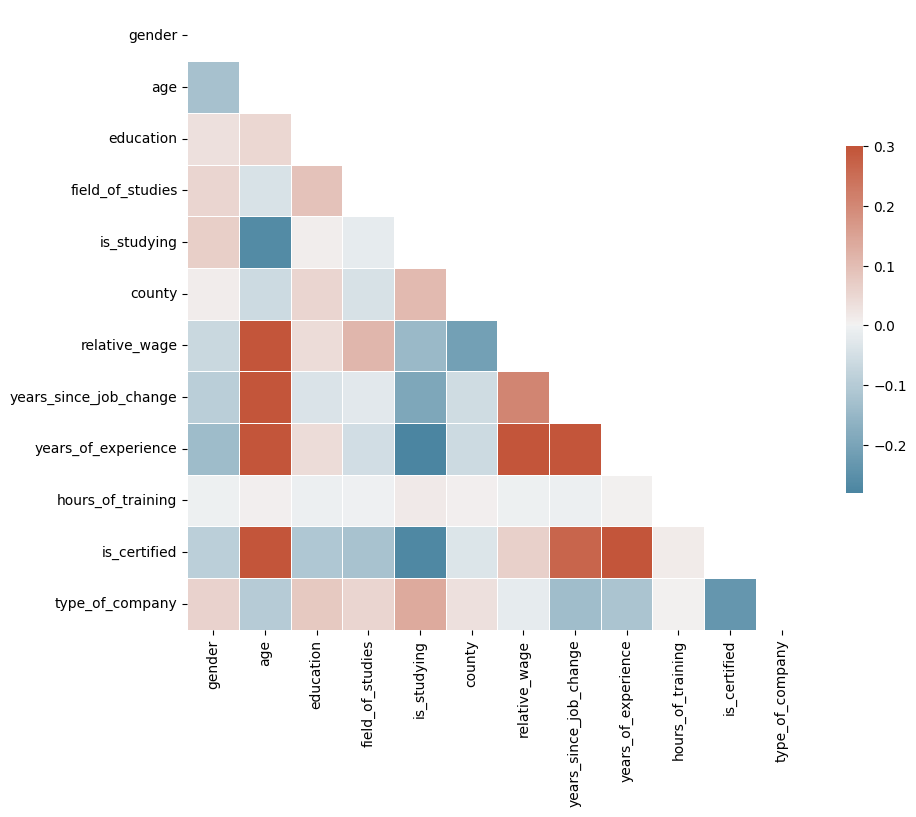

In [17]:
Pearson_corr = X.corr(method='pearson')
mask = np.triu(np.ones_like(Pearson_corr, dtype=bool))
f, ax = plt.subplots(figsize=(10,9))
cmap = sb.diverging_palette(230, 20, as_cmap=True)
sb.heatmap(Pearson_corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={'shrink':.5})

<Axes: >

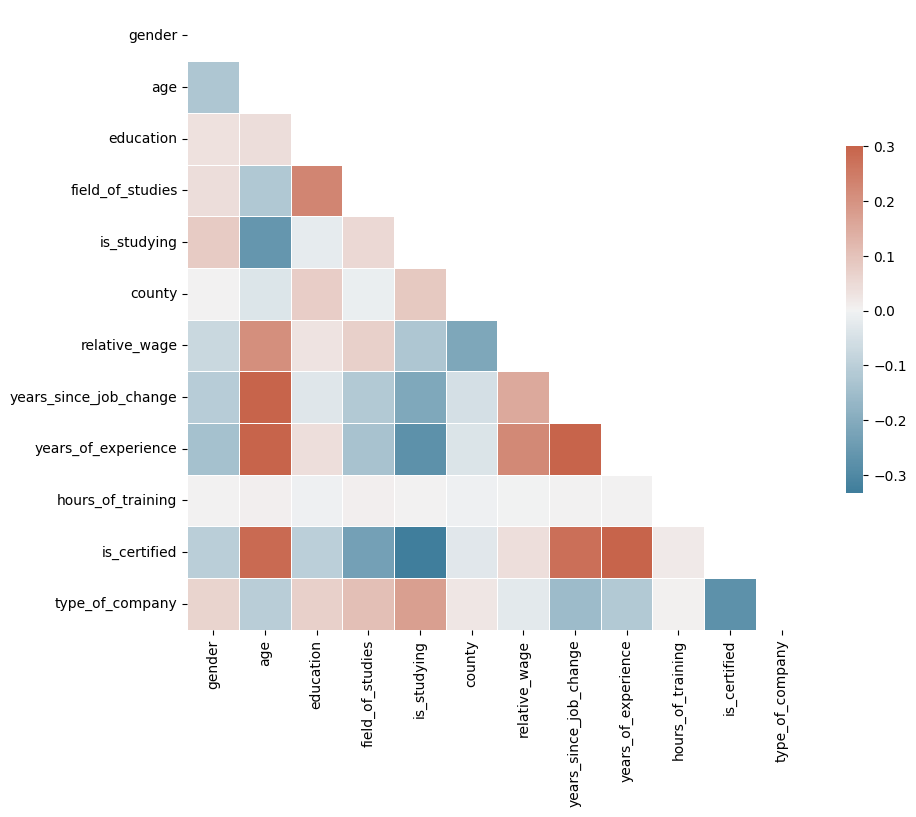

In [18]:
Kendall_corr = X.corr(method='kendall')
mask = np.triu(np.ones_like(Kendall_corr, dtype=bool))
f, ax = plt.subplots(figsize=(10,9))
cmap = sb.diverging_palette(230, 20, as_cmap=True)
sb.heatmap(Kendall_corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={'shrink':.5})

<Axes: >

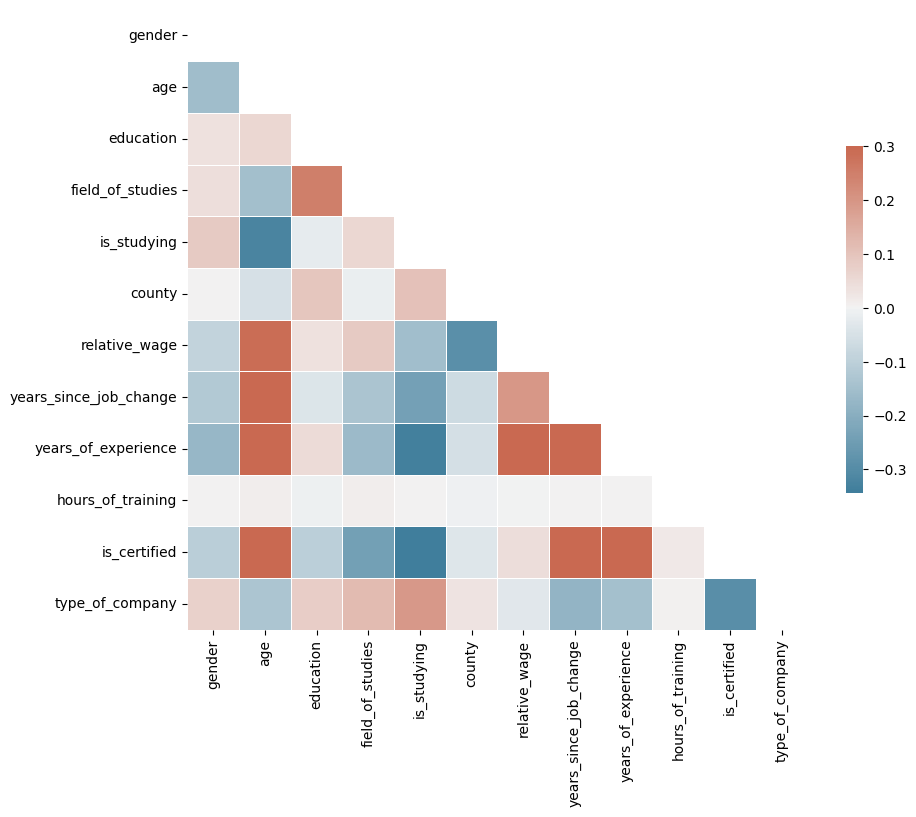

In [19]:
Spearman_corr = X.corr(method='spearman')
mask = np.triu(np.ones_like(Spearman_corr, dtype=bool))
f, ax = plt.subplots(figsize=(10,9))
cmap = sb.diverging_palette(230, 20, as_cmap=True)
sb.heatmap(Spearman_corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={'shrink':.5})

<h3>Checking Correlation between target and features</h3>

In [20]:
X.dtypes

gender                      int64
age                         int64
education                   int64
field_of_studies            int64
is_studying                 int64
county                      int64
relative_wage             float64
years_since_job_change      int32
years_of_experience         int32
hours_of_training           int64
is_certified                int64
type_of_company             int64
dtype: object

In [21]:
y_true = y_true.eq('yes').mul(1)
y_true.dtypes

dtype('int32')

<h3>Testing</h3>

In [22]:
X[['age']].corrwith(X['hours_of_training'])

age    0.006598
dtype: float64

In [26]:
#ridge
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(X, y_true)
clf.score(y_true,)

1.0

In [35]:
X.corrwith(y_true)

gender                   NaN
age                      NaN
education                NaN
field_of_studies         NaN
is_studying              NaN
county                   NaN
relative_wage            NaN
years_since_job_change   NaN
years_of_experience      NaN
hours_of_training        NaN
is_certified             NaN
type_of_company          NaN
dtype: float64

<h3>Regularization of highly correlated variables</h3>

In [36]:
from sklearn.linear_model import Ridge
Ridge(alpha=1.0)

Ridge()

<h1>Selection using SklearnKBest method</h1>

In [44]:
from sklearn.feature_selection import SelectKBest, chi2
k=5
X_train_new = SelectKBest(chi2).fit(X, y_true)

PCA feature engineering

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit_transform(X[['id', 'is_certified']], axis=1)

KeyError: "['id'] not in index"

In [46]:
job_change_test = job_change_test.drop(['id', 'size_of_company', 'hours_of_training', 'relative_wage', 'age'], axis=1)

<h2>ML model prediction</h2>

In [47]:
X

,gender,age,education,field_of_studies,is_studying,county,relative_wage,years_since_job_change,years_of_experience,hours_of_training,is_certified,type_of_company
0,0,22,0,0,0,0,162.84,1,2,18,1,0
1,0,27,0,0,0,1,151.34,1,6,24,1,0
2,0,38,0,0,0,2,114.17,1,13,96,1,1
3,1,47,0,0,0,3,123.55,4,20,36,1,0
4,0,28,0,0,0,0,162.84,1,5,106,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
12422,0,27,1,1,1,64,98.24,0,2,34,0,2
12423,0,31,0,0,0,4,110.45,1,7,116,1,0
12424,0,47,3,0,0,0,162.84,0,20,144,1,0
12425,0,24,0,0,0,4,110.45,0,5,100,1,0


In [48]:
job_change_test

,gender,education,field_of_studies,is_studying,county,years_since_job_change,years_of_experience,is_certified,type_of_company
0,Male,higher_BSc,science,no,county_053,4,9,1,private_company
1,Male,higher_BSc,science,no,county_005,2,9,1,private_company
2,Male,higher_BSc,science,no,county_059,>4,17,0,private_company
3,Male,higher_MSc,science,no,county_118,1,10,1,private_company
4,Male,higher_MSc,science,no,county_110,2,10,1,private_company
...,...,...,...,...,...,...,...,...,...
3303,Male,higher_BSc,science,part_time,county_118,1,2,1,private_company
3304,Male,no_information,no_information,full_time,county_110,1,7,0,private_company
3305,Unknown,higher_BSc,science,full_time,county_118,1,14,1,private_company
3306,Unknown,higher_BSc,science,no,county_074,3,20,1,no_information


In [49]:
y_true

0         No
1         No
2         No
3         No
4         No
        ... 
12422    Yes
12423    Yes
12424     No
12425     No
12426     No
Name: willing_to_change_job, Length: 12427, dtype: object

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
log = LogisticRegression(random_state=0).fit(X,y_true)
print('Wynik wynosi: ', round(log.score(X, y_true), 4))
print(log.coef_, log.classes_, log.intercept_)
y_pred = log.predict(X_test)

Wynik wynosi:  0.76
[[ 0.15292247  0.11789252 -0.14756517 -0.01272919  0.18570281 -0.00858211
  -0.02579246  0.06653265 -0.15603161 -0.00048892 -0.2661889   0.18859104]] ['No' 'Yes'] [0.20821855]


C:\Users\X\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<h3>Traning on different degrees of freedom</h3>

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
train_errors = []
test_errors = []

for degree in degrees:
    poly_features = PolynomialFeatures(degree = degree)
    x_poly_train = poly_features.fit_transform(X[:, np.newaxis])
    x_poly_test = poly_features.fit_transform(x_test[:, np.newaxis])

    #model = 

    train_errors.append(mean_squared_error)


In [ ]:
degrees = [1,5,10,20]
plt.figure(fizise=(10, 6))
plt.plot(degrees, )

Calculate metrics

In [52]:
from sklearn.metrics import classification_report, mean_absolute_error, RocCurveDisplay

In [65]:
print(len(y_true) == len(X))

True


ValueError: x and y must be the same size

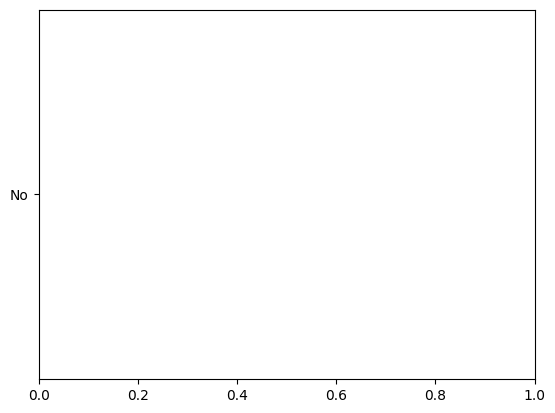

In [66]:
plt.scatter(X, y_true, color='r')
plt.plot(X, y_pred, color='k')
plt.show()

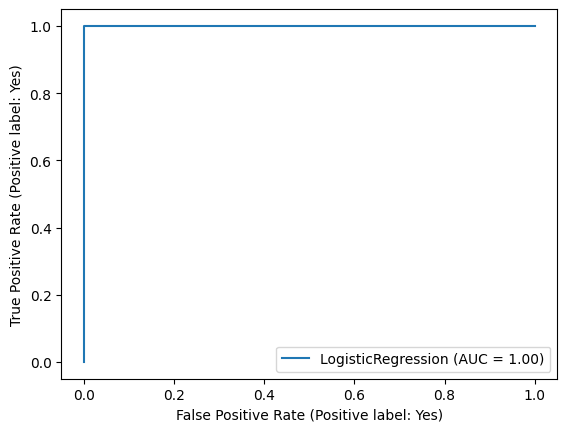

In [56]:
n = len(y_true)
log_viz = RocCurveDisplay.from_estimator(log, X_test, y_pred)

In [85]:
n = len(y_pred)
print(classification_report(y_true.iloc[:n], y_pred))

              precision    recall  f1-score   support

          No       0.75      0.93      0.83      2483
         Yes       0.30      0.09      0.14       825

    accuracy                           0.72      3308
   macro avg       0.53      0.51      0.49      3308
weighted avg       0.64      0.72      0.66      3308



In [89]:
y_true_c = y_true.eq('Yes').mul(1)
y_true_c.dtype

dtype('int32')

In [93]:
import joblib

In [94]:
joblib.dump(log, 'LogisticClassificationModel.joblib')

['LogisticClassificationModel.joblib']